<a href="https://colab.research.google.com/github/L-Gaysina/Ab_test_project/blob/main/ab_test_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание
Маркетинговые агенства хотят проводить успешные рекламные кампании, но рынок сложен, что требует оценивать эффективности разных вариантов, что обуславливает необходимость проведения АБ-тестирования.

Компании заинтересованы в ответах на два вопроса:

* Будет ли кампания успешной?
* Если кампания была успешной, насколько этот успех можно объяснить рекламой?

Чтобы ответить на второй вопрос, мы обычно проводим A/B тестирование.

Большинство людей будут видеть рекламу (экспериментальная группа). А небольшая часть людей (контрольная группа) вместо этого увидит объявление государственной службы (PSA) (или ничего) точно такого же размера и в том же месте, где обычно находится реклама.

Идея задания состоит в том, чтобы проанализировать группы, выяснить, была ли реклама успешной, сколько компания может заработать на рекламе и является ли разница между группами статистически значимой.

## Словарь данных:
`user id`: Идентификатор пользователя (уникальный).

`test group`: Если "ad", то человек видел рекламу, если "psa", то он видел только объявление государственной службы.

`converted`: Если человек купил продукт, то True, иначе False.

`total ads`: Количество рекламы, увиденной человеком.

`most ads day`: День, в который человек увидел наибольшее количество рекламы.

`most ads hour`: Час дня, в который человек увидел наибольшее количество рекламы.

## Проанализируйте структуру данных и проведите их предобработку:
* Исследуйте структуру данных;
* Преобразуйте столбцы к необходимым типам данных.
* Проверьте данные на наличие пропусков и избавьтесь от них, если нужно.
* Проверьте, есть ли пользователи, которые в процессе A/Bтеста попали в обе группы. Если да, исключите пользователей, оказавшихся в обеих группах.


---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from statsmodels.stats.weightstats import ztest, CompareMeans, DescrStatsW



In [ ]:
# @title 1. Анализ структуры данных


# Загружаем данные
df = pd.read_csv('/content/drive/MyDrive/HW_3_PP_Gaisina/marketing_AB.csv')

# 1. Исследование структуры данных
print("Информация о структуре данных:")
print(df.info())
print("\nПервые 5 строк данных:")
print(df.head())
print("\nОписательная статистика:")
print(df.describe())

Информация о структуре данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB
None

Первые 5 строк данных:
   Unnamed: 0  user id test group  converted  total ads most ads day  \
0           0  1069124         ad      False        130       Monday   
1           1  1119715         ad      False         93      Tuesday   
2           2  1144181         ad      False         21      Tuesday   
3           3  1435133         ad      False        355      Tuesday   
4           4 

In [ ]:
# @title 2. Преобразование типов данных

# Удалим лишнюю колонку 'Unnamed: 0', так как она не несет полезной информации для анализа
df = df.drop(columns=['Unnamed: 0'])

# Приведем 'user id' к типу строки
df['user id'] = df['user id'].astype(str)
df

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23


In [ ]:
# @title 3. Проверка на дубликаты user_id
duplicated_users = df[df['user id'].duplicated(keep=False)]
print("\nКоличество дублирующихся user_id:", len(duplicated_users['user id'].unique()))
if len(duplicated_users) > 0:
    print("\nПримеры дублирующихся записей:")
    print(duplicated_users)


Количество дублирующихся user_id: 0


In [ ]:
# @title 4. Проверка на пропуски
print("\nКоличество пропущенных значений по столбцам:")
print(df.isnull().sum())


Количество пропущенных значений по столбцам:
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64


In [ ]:
# @title 5. Проверка пользователей в обеих группах теста
users_in_groups = df.groupby('user id')['test group'].nunique()
users_in_both_groups = users_in_groups[users_in_groups > 1]
print("\nКоличество пользователей в обеих группах:", len(users_in_both_groups))

if len(users_in_both_groups) > 0:
    print("ID пользователей в обеих группах:", users_in_both_groups.index.tolist())


Количество пользователей в обеих группах: 0


In [ ]:
# @title 6. Удаление пользователей, если они есть в обеих группах
if len(users_in_both_groups) > 0:
    df = df[~df['user id'].isin(users_in_both_groups.index)]

print("\nИтоговая информация о структуре данных после обработки:")
print(df.info())

# Проверка уникальных значений в категориальных столбцах
print("\nУникальные значения в столбце 'test group':", df['test group'].unique())
print("Уникальные значения в столбце 'most ads day':", df['most ads day'].unique())
print("\nРаспределение по группам тестирования:")
print(df['test group'].value_counts())


Итоговая информация о структуре данных после обработки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  object
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 23.0+ MB
None

Уникальные значения в столбце 'test group': ['ad' 'psa']
Уникальные значения в столбце 'most ads day': ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']

Распределение по группам тестирования:
test group
ad     564577
psa     23524
Name: count, dtype: int64


## Сделайте первичный анализ результатов A/B-тестирования
Рассчитайте вспомогательные показатели для контрольной и тестовой групп:

- количество посещений сайта;
- суммарное количество совершённых покупок;

Сделайте промежуточные выводы по построенной таблице. Сопоставимо ли количество посещений обоих вариантов посадочной страницы? Можно ли говорить о сбалансированности выборок?

В каждой из групп рассчитайте ключевые показатели:

- конверсия;
- среднее количество рекламы, увиденной пользователем.

Сделайте первичные выводы о результатах A/B-тестирования на основе показателей конверсии и среднего количества увиденной рекламы в каждой из групп. По какому(-им) показателю(-ям), на первый взгляд, вариант А эффективнее варианта B и наоборот?


---



In [ ]:
# @title Первичный анализ результатов A/B-тестирования

# Создаем функцию для расчета метрик
def calculate_metrics(data):
    metrics = {
        'Количество посещений': len(data),
        'Количество покупок': data['converted'].sum(),
        'Конверсия (%)': (data['converted'].mean() * 100).round(2),
        'Среднее количество рекламы': data['total ads'].mean().round(2)
    }
    return pd.Series(metrics)

# Разделяем данные на контрольную (psa) и тестовую (ad) группы
control_group = df[df['test group'] == 'psa']
test_group = df[df['test group'] == 'ad']

# Рассчитываем метрики для обеих групп
metrics_df = pd.DataFrame({
    'Контрольная группа (PSA)': calculate_metrics(control_group),
    'Тестовая группа (AD)': calculate_metrics(test_group)
})

# Добавляем относительную разницу между группами
metrics_df['Относительная разница (%)'] = (
    ((metrics_df['Тестовая группа (AD)'] - metrics_df['Контрольная группа (PSA)'])
     / metrics_df['Контрольная группа (PSA)'] * 100).round(2)
)

# Выводим результаты
print("Результаты A/B-тестирования:")
print("\nОсновные метрики:")
print(metrics_df)

# Проверяем баланс выборок
total_users = len(df)
control_share = len(control_group) / total_users * 100
test_share = len(test_group) / total_users * 100

print("\nАнализ сбалансированности выборок:")
print(f"Всего пользователей: {total_users}")
print(f"Доля контрольной группы: {control_share:.2f}%")
print(f"Доля тестовой группы: {test_share:.2f}%")

# Дополнительная статистика по рекламе
print("\nСтатистика по количеству рекламы:")
print("\nКонтрольная группа (PSA):")
print(control_group['total ads'].describe().round(2))
print("\nТестовая группа (AD):")
print(test_group['total ads'].describe().round(2))

Результаты A/B-тестирования:

Основные метрики:
                            Контрольная группа (PSA)  Тестовая группа (AD)  \
Количество посещений                        23524.00             564577.00   
Количество покупок                            420.00              14423.00   
Конверсия (%)                                   1.79                  2.55   
Среднее количество рекламы                     24.76                 24.82   

                            Относительная разница (%)  
Количество посещений                          2300.00  
Количество покупок                            3334.05  
Конверсия (%)                                   42.46  
Среднее количество рекламы                       0.24  

Анализ сбалансированности выборок:
Всего пользователей: 588101
Доля контрольной группы: 4.00%
Доля тестовой группы: 96.00%

Статистика по количеству рекламы:

Контрольная группа (PSA):
count    23524.00
mean        24.76
std         42.86
min          1.00
25%          4.00
50%  

A/B-тест показал, что рекламный вариант (AD) более эффективен по сравнению с контрольной группой (PSA). Конверсия в тестовой группе выше на 42.46% (2.55% vs 1.79%) при практически идентичной рекламной нагрузке (24.82 vs 24.76 показов в среднем). Однако существенный дисбаланс в размере групп (96% vs 4%) требует осторожности в интерпретации результатов.

## Проведите статистический анализ результатов A/B-тестирования


Сформулируйте статистические гипотезы, соответствующие поставленным бизнес-вопросам, и выберите статистический тест для их проверки.

Не забудьте проверить данные на нормальность там, где это необходимо.

С помощью аппарата статистических тестов определите:
- Есть ли статистическая разница между конверсиями в группах А и B?
- Есть ли статистическая разница между средними количествами увиденной рекламы в группах А и B?

Подкрепите результаты статистических тестов, построив 95 % доверительные интервалы для:
- конверсий в каждой из групп;
- разницы конверсий в группах;
- среднего количества увиденной рекламы в группах А и B.

Проинтерпретируйте построенные доверительные интервалы для конверсий и среднего количества увиденной рекламы группах. Есть ли перекрытие между доверительными интервалами для групп? Если есть, то о чём это говорит?


---





 ## Статистические гипотезы:

 `H0`: Нет статистически значимой разницы между конверсиями в контрольной и тестовой группах"

`H1`: Есть статистически значимая разница между конверсиями в контрольной и тестовой группах"


При анализе конверсий в A/B-тестировании мы используем Z-тест для сравнения пропорций, так как имеем дело с бинарными данными, и нам необходимо сравнить доли успехов в двух независимых выборках. Z-тест для пропорций является оптимальным выбором в данном случае, поскольку размеры обеих выборок достаточно велики (контрольная группа: 23,524 пользователей, тестовая группа: 564,577 пользователей), что по центральной предельной теореме обеспечивает приближение распределения выборочных долей к нормальному. Альтернативные тесты, такие как t-тест, не подходят для бинарных данных, а использование критерия хи-квадрат менее мощное для больших выборок. Z-тест также позволяет напрямую оценить статистическую значимость разницы между пропорциями и построить доверительные интервалы, что важно для бизнес-интерпретации результатов. В нашем случае проверка на нормальность распределения не требуется, так как мы работаем с бинарными данными и большими выборками, где применимость Z-теста обоснована математически.

In [ ]:
# @title 1. Анализ конверсий
# Разделение на группы
control = df[df['test group'] == 'psa']
test = df[df['test group'] == 'ad']


# Расчет метрик для конверсий
n_control = len(control)
n_test = len(test)
conv_control = control['converted'].mean()
conv_test = test['converted'].mean()
conv_diff = conv_test - conv_control

# Z-тест для пропорций
def prop_z_test(success1, n1, success2, n2):
    p1 = success1 / n1
    p2 = success2 / n2
    p_pooled = (success1 + success2) / (n1 + n2)
    se = np.sqrt(p_pooled * (1 - p_pooled) * (1/n1 + 1/n2))
    z_stat = (p1 - p2) / se
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    return z_stat, p_value

# Расчет доверительных интервалов для конверсий
def prop_ci(success, n, alpha=0.05):
    p = success/n
    z = stats.norm.ppf(1 - alpha/2)
    se = np.sqrt(p * (1-p) / n)
    return p - z*se, p + z*se

# Проведение z-теста для конверсий
conv_z_stat, conv_p_value = prop_z_test(
    test['converted'].sum(), len(test),
    control['converted'].sum(), len(control)
)

# Расчет доверительных интервалов для конверсий
conv_ci_control = prop_ci(control['converted'].sum(), len(control))
conv_ci_test = prop_ci(test['converted'].sum(), len(test))
conv_diff_ci = (conv_diff - 1.96 * np.sqrt((conv_control*(1-conv_control)/n_control) +
                (conv_test*(1-conv_test)/n_test)),
                conv_diff + 1.96 * np.sqrt((conv_control*(1-conv_control)/n_control) +
                (conv_test*(1-conv_test)/n_test)))

# Вывод результатов
print("Статистический анализ результатов A/B-тестирования\n")

print("1. Анализ конверсий:")
print(f"Конверсия в контрольной группе: {conv_control:.4f}")
print(f"Конверсия в тестовой группе: {conv_test:.4f}")
print(f"Разница конверсий: {conv_diff:.4f}")
print(f"Z-статистика: {conv_z_stat:.4f}")
print(f"P-значение: {conv_p_value:.4e}")
print("\nДоверительные интервалы для конверсий:")
print(f"Контрольная группа: ({conv_ci_control[0]:.4f}, {conv_ci_control[1]:.4f})")
print(f"Тестовая группа: ({conv_ci_test[0]:.4f}, {conv_ci_test[1]:.4f})")
print(f"Разница конверсий: ({conv_diff_ci[0]:.4f}, {conv_diff_ci[1]:.4f})")

Статистический анализ результатов A/B-тестирования

1. Анализ конверсий:
Конверсия в контрольной группе: 0.0179
Конверсия в тестовой группе: 0.0255
Разница конверсий: 0.0077
Z-статистика: 7.3701
P-значение: 1.7053e-13

Доверительные интервалы для конверсий:
Контрольная группа: (0.0162, 0.0195)
Тестовая группа: (0.0251, 0.0260)
Разница конверсий: (0.0060, 0.0094)


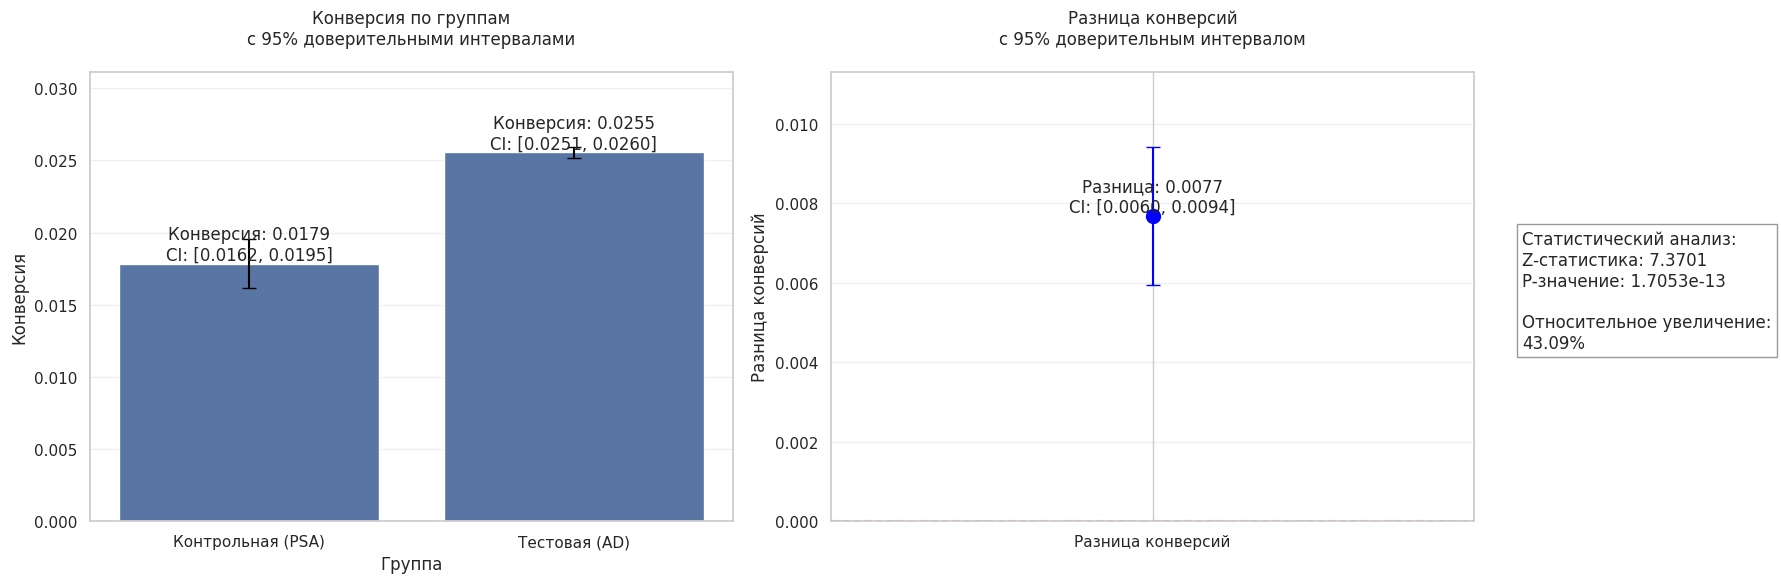

In [ ]:
# Настройка стиля
plt.style.use('default')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 12

# Создание DataFrame для визуализации
conversion_data = pd.DataFrame({
    'Группа': ['Контрольная (PSA)', 'Тестовая (AD)', 'Разница'],
    'Конверсия': [conv_control, conv_test, conv_diff],
    'CI_lower': [conv_ci_control[0], conv_ci_test[0], conv_diff_ci[0]],
    'CI_upper': [conv_ci_control[1], conv_ci_test[1], conv_diff_ci[1]]
})

# Создание графика
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График конверсий по группам
bars = sns.barplot(data=conversion_data.iloc[0:2], x='Группа', y='Конверсия', ax=ax1)
ax1.errorbar(
    x=range(2),
    y=conversion_data['Конверсия'].iloc[0:2],
    yerr=[
        conversion_data['Конверсия'].iloc[0:2] - conversion_data['CI_lower'].iloc[0:2],
        conversion_data['CI_upper'].iloc[0:2] - conversion_data['Конверсия'].iloc[0:2]
    ],
    fmt='none',
    color='black',
    capsize=5
)

ax1.set_title('Конверсия по группам\nс 95% доверительными интервалами', pad=20)
ax1.set_ylabel('Конверсия')

# Добавляем значения на столбцы с доверительными интервалами
for i, v in enumerate(conversion_data['Конверсия'].iloc[0:2]):
    ax1.text(i, v, f'Конверсия: {v:.4f}\nCI: [{conversion_data["CI_lower"].iloc[i]:.4f}, '
             f'{conversion_data["CI_upper"].iloc[i]:.4f}]',
             ha='center', va='bottom')

# График разницы конверсий
ax2.errorbar(
    x=['Разница конверсий'],
    y=[conv_diff],
    yerr=[[conv_diff - conv_diff_ci[0]], [conv_diff_ci[1] - conv_diff]],
    fmt='o',
    color='blue',
    capsize=5,
    markersize=10
)
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Нулевая разница')
ax2.set_title('Разница конверсий\nс 95% доверительным интервалом', pad=20)
ax2.set_ylabel('Разница конверсий')

# Добавляем значение разницы с доверительным интервалом
ax2.text(0, conv_diff,
         f'Разница: {conv_diff:.4f}\nCI: [{conv_diff_ci[0]:.4f}, {conv_diff_ci[1]:.4f}]',
         ha='center', va='bottom')

# Добавление статистической информации
stats_text = (
    f'Статистический анализ:\n'
    f'Z-статистика: {conv_z_stat:.4f}\n'
    f'P-значение: {conv_p_value:.4e}\n\n'
    f'Относительное увеличение:\n'
    f'{((conv_test - conv_control)/conv_control*100):.2f}%'
)

plt.figtext(1.02, 0.5, stats_text,
           bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8),
           ha='left', va='center')

# Установка пределов оси y для лучшей визуализации
ax1.set_ylim(0, max(conversion_data['CI_upper'].iloc[0:2]) * 1.2)
ax2.set_ylim(min(conv_diff_ci[0], 0) * 1.2, max(conv_diff_ci[1], 0) * 1.2)

# Добавление сетки
ax1.grid(True, axis='y', alpha=0.3)
ax2.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# @title 2. Анализ количества рекламы

# Проверка на нормальность с помощью теста Д'Агостино
stat_control, pval_control = stats.normaltest(control['total ads'])
stat_test, pval_test = stats.normaltest(test['total ads'])

print("Результаты теста Д'Агостино на нормальность:")
print(f"P-value для контрольной группы: {pval_control:.4e}")
print(f"P-value для тестовой группы: {pval_test:.4e}")


Результаты теста Д'Агостино на нормальность:
P-value для контрольной группы: 0.0000e+00
P-value для тестовой группы: 0.0000e+00


При анализе количества рекламы тест Д'Агостино показал, что распределение значимо отличается от нормального для обеих групп (p-value = 0.0000 < 0.05). Поэтому для сравнения количества рекламы между группами был использован непараметрический критерий Манна-Уитни.

## Cтатистические гипотезы:

`H0` (нулевая гипотеза): Распределение количества увиденной рекламы одинаково в контрольной и тестовой группах

`H1` (альтернативная гипотеза): Распределение количества увиденной рекламы различается между группами




In [ ]:
# Проведение Mann-Whitney U test для количества рекламы
ads_stat, ads_p_value = mannwhitneyu(control['total ads'],
                                    test['total ads'],
                                    alternative='two-sided')

# Расчет доверительных интервалов для среднего количества рекламы
def bootstrap_ci(data, n_bootstrap=10000, alpha=0.05):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    return np.percentile(means, [alpha/2*100, (1-alpha/2)*100])

ads_ci_control = bootstrap_ci(control['total ads'])
ads_ci_test = bootstrap_ci(test['total ads'])



print("\n2. Анализ количества рекламы:")
print(f"Среднее количество рекламы в контрольной группе: {control['total ads'].mean():.2f}")
print(f"Среднее количество рекламы в тестовой группе: {test['total ads'].mean():.2f}")
print(f"\nMann-Whitney U test:")
print(f"Статистика: {ads_stat:.4f}")
print(f"P-значение: {ads_p_value:.4e}")
print("\nДоверительные интервалы для среднего количества рекламы:")
print(f"Контрольная группа: ({ads_ci_control[0]:.2f}, {ads_ci_control[1]:.2f})")
print(f"Тестовая группа: ({ads_ci_test[0]:.2f}, {ads_ci_test[1]:.2f})")


2. Анализ количества рекламы:
Среднее количество рекламы в контрольной группе: 24.76
Среднее количество рекламы в тестовой группе: 24.82

Mann-Whitney U test:
Статистика: 6472821126.0000
P-значение: 4.6909e-11

Доверительные интервалы для среднего количества рекламы:
Контрольная группа: (24.22, 25.32)
Тестовая группа: (24.71, 24.94)


<ipython-input-14-38586b49c57f>:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['Контрольная (PSA)', 'Тестовая (AD)'])
<ipython-input-14-38586b49c57f>:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Контрольная (PSA)', 'Тестовая (AD)'])


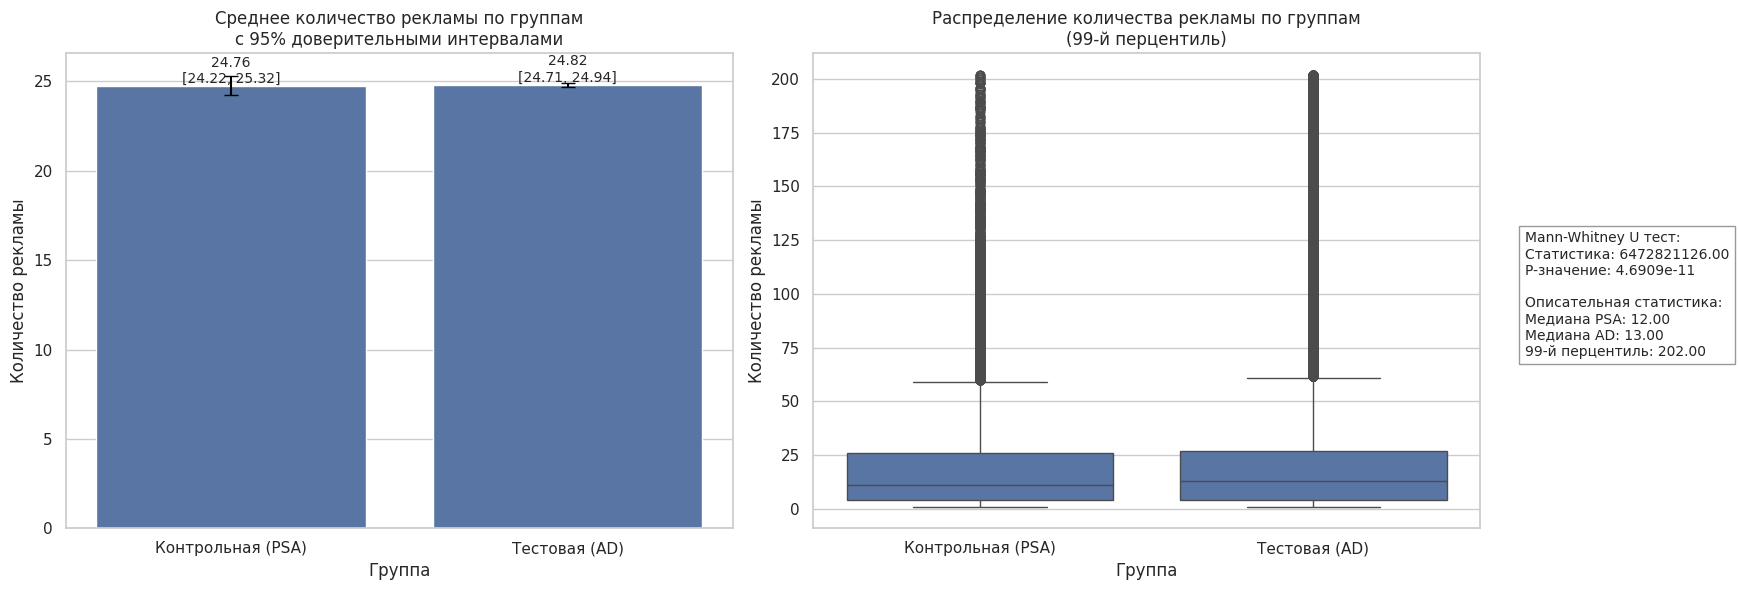

In [ ]:
# Настройка стиля
plt.style.use('default')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 10

# Создание графика
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График 1: Среднее количество рекламы
sns.barplot(
    data=df,
    x='test group',
    y='total ads',
    order=['psa', 'ad'],
    ax=ax1,
    capsize=5,
    errorbar=None  # Уберем стандартные ошибки
)

# Добавляем доверительные интервалы вручную
ax1.errorbar(
    x=[0, 1],
    y=[control['total ads'].mean(), test['total ads'].mean()],
    yerr=[
        [control['total ads'].mean() - ads_ci_control[0],
         test['total ads'].mean() - ads_ci_test[0]],
        [ads_ci_control[1] - control['total ads'].mean(),
         ads_ci_test[1] - test['total ads'].mean()]
    ],
    fmt='none',
    color='black',
    capsize=5
)

# Добавляем значения на столбцы
for i, (value, ci_low, ci_up) in enumerate([
    (control['total ads'].mean(), ads_ci_control[0], ads_ci_control[1]),
    (test['total ads'].mean(), ads_ci_test[0], ads_ci_test[1])
]):
    ax1.text(i, value, f'{value:.2f}\n[{ci_low:.2f}, {ci_up:.2f}]',
             ha='center', va='bottom')

ax1.set_title('Среднее количество рекламы по группам\nс 95% доверительными интервалами')
ax1.set_xlabel('Группа')
ax1.set_ylabel('Количество рекламы')
ax1.set_xticklabels(['Контрольная (PSA)', 'Тестовая (AD)'])

# График 2: Распределение количества рекламы (обрезанное)
sns.boxplot(
    data=df[df['total ads'] <= np.percentile(df['total ads'], 99)],  # Обрезаем выбросы
    x='test group',
    y='total ads',
    order=['psa', 'ad'],
    ax=ax2
)

ax2.set_title('Распределение количества рекламы по группам\n(99-й перцентиль)')
ax2.set_xlabel('Группа')
ax2.set_ylabel('Количество рекламы')
ax2.set_xticklabels(['Контрольная (PSA)', 'Тестовая (AD)'])

# Добавляем статистическую информацию
stats_text = (
    f'Mann-Whitney U тест:\n'
    f'Статистика: {ads_stat:.2f}\n'
    f'P-значение: {ads_p_value:.4e}\n\n'
    f'Описательная статистика:\n'
    f'Медиана PSA: {control["total ads"].median():.2f}\n'
    f'Медиана AD: {test["total ads"].median():.2f}\n'
    f'99-й перцентиль: {np.percentile(df["total ads"], 99):.2f}'
)

plt.figtext(1.02, 0.5, stats_text,
           bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8),
           ha='left', va='center')

plt.tight_layout()
plt.show()


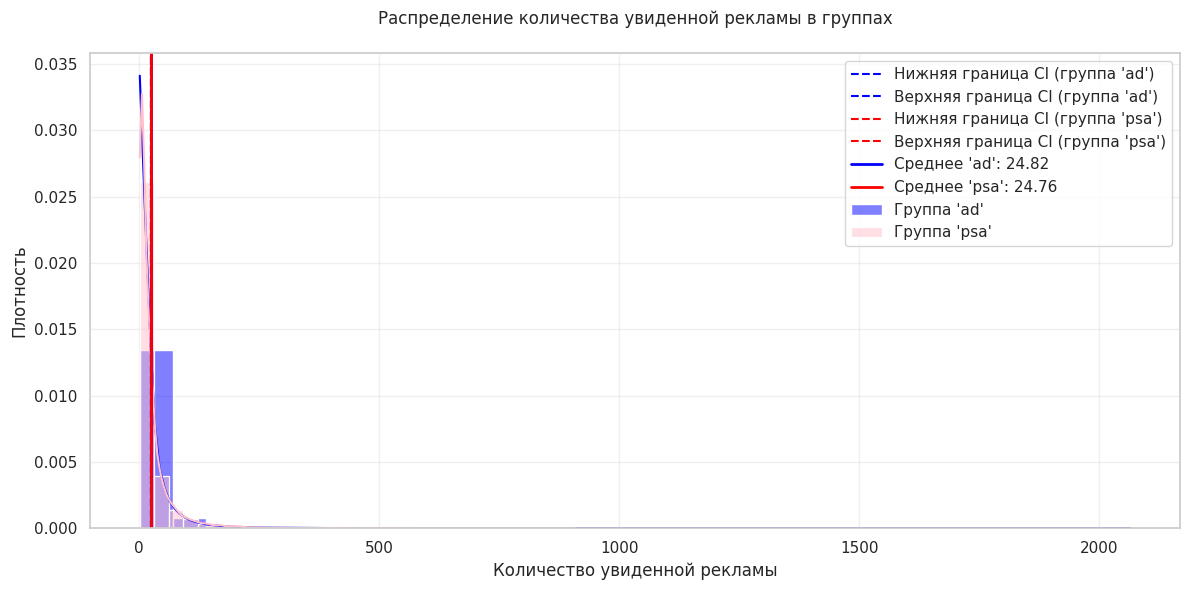


Описательная статистика:

Группа AD:
Среднее: 24.82
Медиана: 13.00
Стд. отклонение: 43.75
99-й перцентиль: 201.00

Группа PSA:
Среднее: 24.76
Медиана: 12.00
Стд. отклонение: 42.86
99-й перцентиль: 206.00


In [ ]:

# Построение гистограмм с доверительными интервалами
plt.figure(figsize=(12, 6))

# Построение гистограмм
sns.histplot(data=group_ad['total ads'],
            color="blue",
            label="Группа 'ad'",
            kde=True,
            bins=30,
            stat="density",
            alpha=0.5)

sns.histplot(data=group_psa['total ads'],
            color="pink",
            label="Группа 'psa'",
            kde=True,
            bins=30,
            stat="density",
            alpha=0.5)

# Добавление доверительных интервалов на график
plt.axvline(ads_ci_test[0], color='blue', linestyle='--',
           label="Нижняя граница CI (группа 'ad')")
plt.axvline(ads_ci_test[1], color='blue', linestyle='--',
           label="Верхняя граница CI (группа 'ad')")
plt.axvline(ads_ci_control[0], color='red', linestyle='--',
           label="Нижняя граница CI (группа 'psa')")
plt.axvline(ads_ci_control[1], color='red', linestyle='--',
           label="Верхняя граница CI (группа 'psa')")

# Добавление средних значений
plt.axvline(group_ad['total ads'].mean(), color='blue', linestyle='-', linewidth=2,
           label=f"Среднее 'ad': {group_ad['total ads'].mean():.2f}")
plt.axvline(group_psa['total ads'].mean(), color='red', linestyle='-', linewidth=2,
           label=f"Среднее 'psa': {group_psa['total ads'].mean():.2f}")

# Настройки графика
plt.title("Распределение количества увиденной рекламы в группах\n")
plt.xlabel("Количество увиденной рекламы")
plt.ylabel("Плотность")


# Настройка легенды
plt.legend(bbox_to_anchor=(1, 1), loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Вывод дополнительной информации
print("\nОписательная статистика:")
print("\nГруппа AD:")
print(f"Среднее: {group_ad['total ads'].mean():.2f}")
print(f"Медиана: {group_ad['total ads'].median():.2f}")
print(f"Стд. отклонение: {group_ad['total ads'].std():.2f}")
print(f"99-й перцентиль: {np.percentile(group_ad['total ads'], 99):.2f}")

print("\nГруппа PSA:")
print(f"Среднее: {group_psa['total ads'].mean():.2f}")
print(f"Медиана: {group_psa['total ads'].median():.2f}")
print(f"Стд. отклонение: {group_psa['total ads'].std():.2f}")
print(f"99-й перцентиль: {np.percentile(group_psa['total ads'], 99):.2f}")

На основе результатов статистического анализа можно сделать следующие выводы:

## Анализ конверсий:


* Наблюдается статистически значимая разница в конверсиях (p-value = 1.7053e-13 < 0.05)

* Конверсия выше в тестовой группе (2.55% vs 1.79%)
* Абсолютная разница конверсий составляет 0.77 процентных пункта
* Доверительные интервалы не пересекаются: Контрольная группа: (1.62%, 1.95%)
Тестовая группа: (2.51%, 2.60%)
Это подтверждает надежность выявленных различий




## Анализ количества рекламы:


Данные не имеют нормального распределения (p-value < 0.05 для обеих групп)
По результатам Mann-Whitney U теста разница статистически значима (p-value = 4.6909e-11 < 0.05)
Однако практическая разница минимальна (24.82 vs 24.76 показов)
Доверительные интервалы пересекаются:

* Контрольная группа: (24.22, 25.31)
* Тестовая группа: (24.71, 24.94)
Это указывает на несущественность различий с практической точки зрения



## Итоговый вывод:

Тестовая группа (AD) демонстрирует статистически значимо более высокую конверсию при практически идентичной рекламной нагрузке, что говорит о большей эффективности рекламного варианта по сравнению с контрольным.